In [1]:
import sys
sys.path.insert(0, "/Users/dacostlu/dev/gym-solvers")
print(sys.path)

['/Users/dacostlu/dev/gym-solvers', '', '/anaconda2/envs/python3.6/lib/python36.zip', '/anaconda2/envs/python3.6/lib/python3.6', '/anaconda2/envs/python3.6/lib/python3.6/lib-dynload', '/anaconda2/envs/python3.6/lib/python3.6/site-packages', '/anaconda2/envs/python3.6/lib/python3.6/site-packages/cycler-0.10.0-py3.6.egg', '/Users/dacostlu/dev/gym', '/anaconda2/envs/python3.6/lib/python3.6/site-packages/IPython/extensions', '/Users/dacostlu/.ipython']


In [2]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import numpy as np
import gym
from frozenlake.q_by_table import FrisbeeSearcher


In [3]:
env = gym.make('FrozenLake-v0')
fs_table = FrisbeeSearcher(env=env)


In [4]:
def run_redirecting_stdout(num_episodes, gamma, exploration_value, learning_rate, stop_on_perc_successes, stop_rate_of_success, stop_length_of_checking):
    old_stdout = sys.stdout
    sys.stdout = open('/tmp/luis/stdout.txt', 'w')
    # run!
    successes_history = fs_table.train(num_episodes, gamma, exploration_value, learning_rate, stop_on_perc_successes, stop_rate_of_success, stop_length_of_checking)
    # restore stdout:
    sys.stdout = old_stdout
    # 
    return successes_history


In [25]:
def run_and_plot(num_episodes, gamma, exploration_value, learning_rate, stop_on_perc_successes, stop_rate_of_success, stop_length_of_checking):
    successes_history_1 = run_redirecting_stdout(num_episodes , gamma, exploration_value, learning_rate, stop_on_perc_successes, stop_rate_of_success, stop_length_of_checking)
    xs = [x for x,_ in successes_history_1]
    ys = [y for _,y in successes_history_1]
#     print(xs[-1:][0])
#     print(ys)
    figsize(13.5, 4.5)
    plt.bar(xs, ys)
    plt.hlines(y=stop_on_perc_successes, xmin=0, xmax=xs[-1:][0], linestyles="--")
    plt.xlim([0, xs[-1:][0]])
    plt.xlabel("Episode")
    plt.ylabel("Success on 50 tries")
    plt.title("History")
    


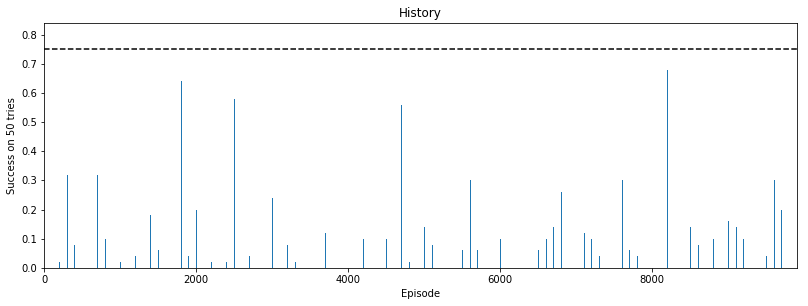

In [27]:
run_and_plot(num_episodes = 10000 , gamma = 0.85, exploration_value = 0.1, learning_rate = 0.85, stop_on_perc_successes = 0.75, stop_rate_of_success = 5/10, stop_length_of_checking=10)

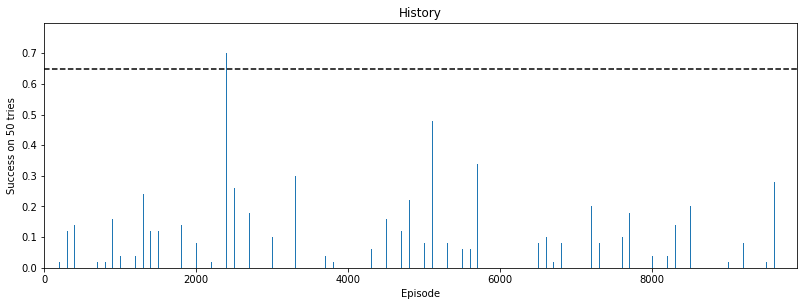

In [30]:
run_and_plot(num_episodes = 10000 , gamma = 0.85, exploration_value = 0.15, learning_rate = 0.85, stop_on_perc_successes = 0.65, stop_rate_of_success = 5/10, stop_length_of_checking=10)

<BarContainer object of 100 artists>

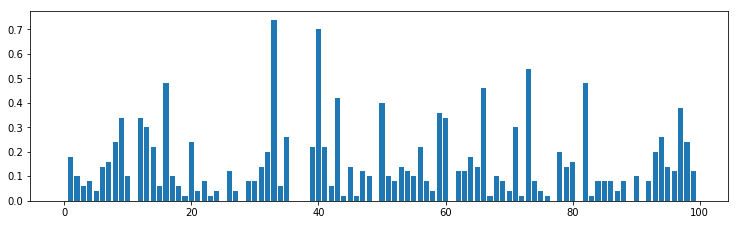

In [26]:
figsize(12.5, 3.5)
plt.bar(np.arange(len(successes_history_2)), list(map(lambda x: x / 50, successes_history_2)))
